In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

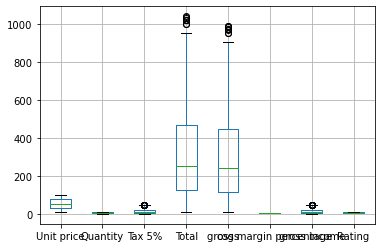

In [9]:
df.boxplot()

<ipython-input-4-4cc2013691ce>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-4-4cc2013691ce>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

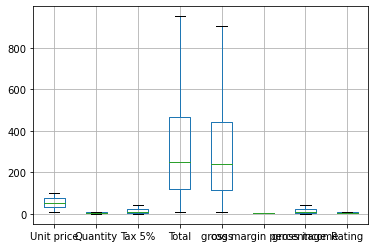

In [4]:
cols = ['Tax 5%', 'Total','gross margin percentage','Payment']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.boxplot()

In [17]:
df["Total"].value_counts()

93.7440     2
189.0945    2
829.0800    2
87.2340     2
470.9880    2
           ..
456.2880    1
423.1500    1
198.9960    1
570.7800    1
54.0435     1
Name: Total, Length: 990, dtype: int64

<AxesSubplot:title={'center':'Grouped by Total'}, xlabel='Total', ylabel='count'>

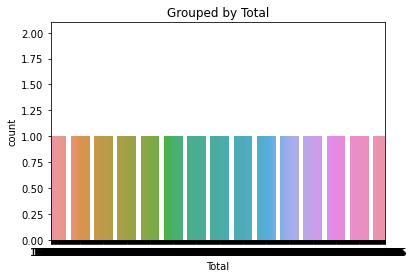

In [18]:
plt.title('Grouped by Total')
sns.countplot(x="Total",data=df)

In [15]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot:title={'center':'Grouped by Payment'}, xlabel='Payment', ylabel='count'>

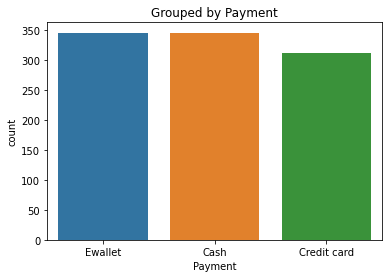

In [16]:
plt.title('Grouped by Payment')
sns.countplot(x="Payment",data=df)

In [19]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

<AxesSubplot:title={'center':'Grouped by City'}, xlabel='City', ylabel='count'>

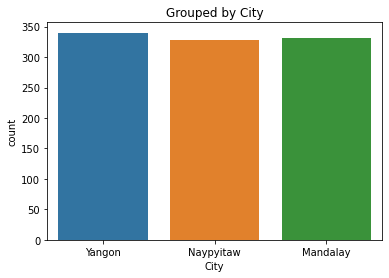

In [20]:
plt.title('Grouped by City')
sns.countplot(x="City",data=df)

In [22]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot:title={'center':'Grouped by Product line'}, xlabel='Product line', ylabel='count'>

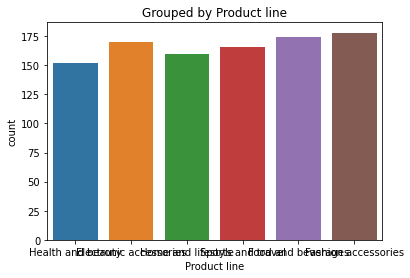

In [21]:
plt.title('Grouped by Product line')
sns.countplot(x="Product line",data=df)

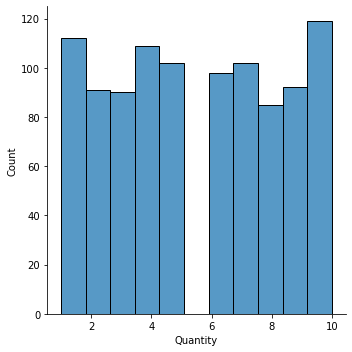

In [23]:
sns.displot(df["Quantity"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

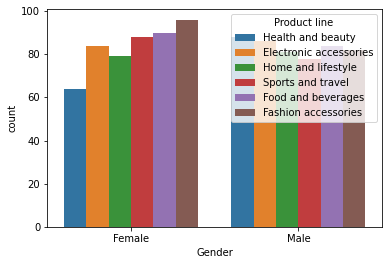

In [34]:
sns.countplot(x="Gender",hue="Product line",data=df)

<AxesSubplot:xlabel='Total', ylabel='count'>

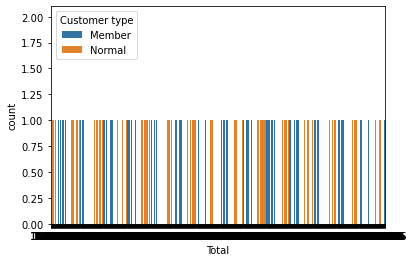

In [33]:
sns.countplot(x="Total",hue="Customer type",data=df)

In [25]:
pd.crosstab(df["Total"],df["Payment"])

Payment,Cash,Credit card,Ewallet
Total,,,
10.6785,1,0,0
12.6945,0,1,0
13.1670,1,0,0
13.4190,0,0,1
14.6790,0,0,1
...,...,...,...
1022.4900,0,0,1
1023.7500,0,0,1
1034.4600,0,0,1


In [26]:
pd.crosstab(df["Quantity"],df["City"])

City,Mandalay,Naypyitaw,Yangon
Quantity,,,
1,32,44,36
2,33,30,28
3,36,20,34
4,39,33,37
5,28,30,44
6,36,31,31
7,28,38,36
8,30,30,25
9,34,27,31


In [28]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

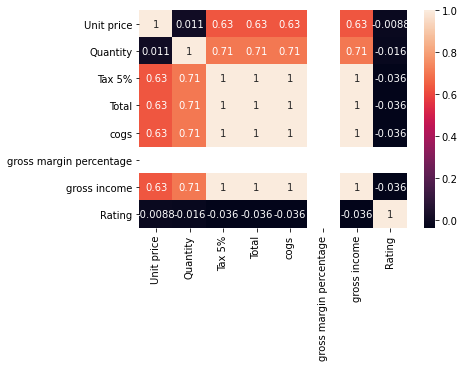

In [29]:
sns.heatmap(df.corr(),annot=True)